In [54]:
# !sudo apt install tesseract-ocr
# !pip install pytesseract
# !pip install Pillow==10.1.0
# !pip3 install opencv-python
# !pip3 install numpy

In [55]:
import pytesseract
import shutil
import os
import random
import PIL
from PIL import Image
import cv2
from matplotlib import pyplot as plt

# Opening Image

In [56]:
im_file = "D:\\homework\\D4-1\\OCR_ReceiptWise\\testpytesseract\\dataset\\scb\\IMG_2511.JPG"
img = cv2.imread(im_file)

In [57]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

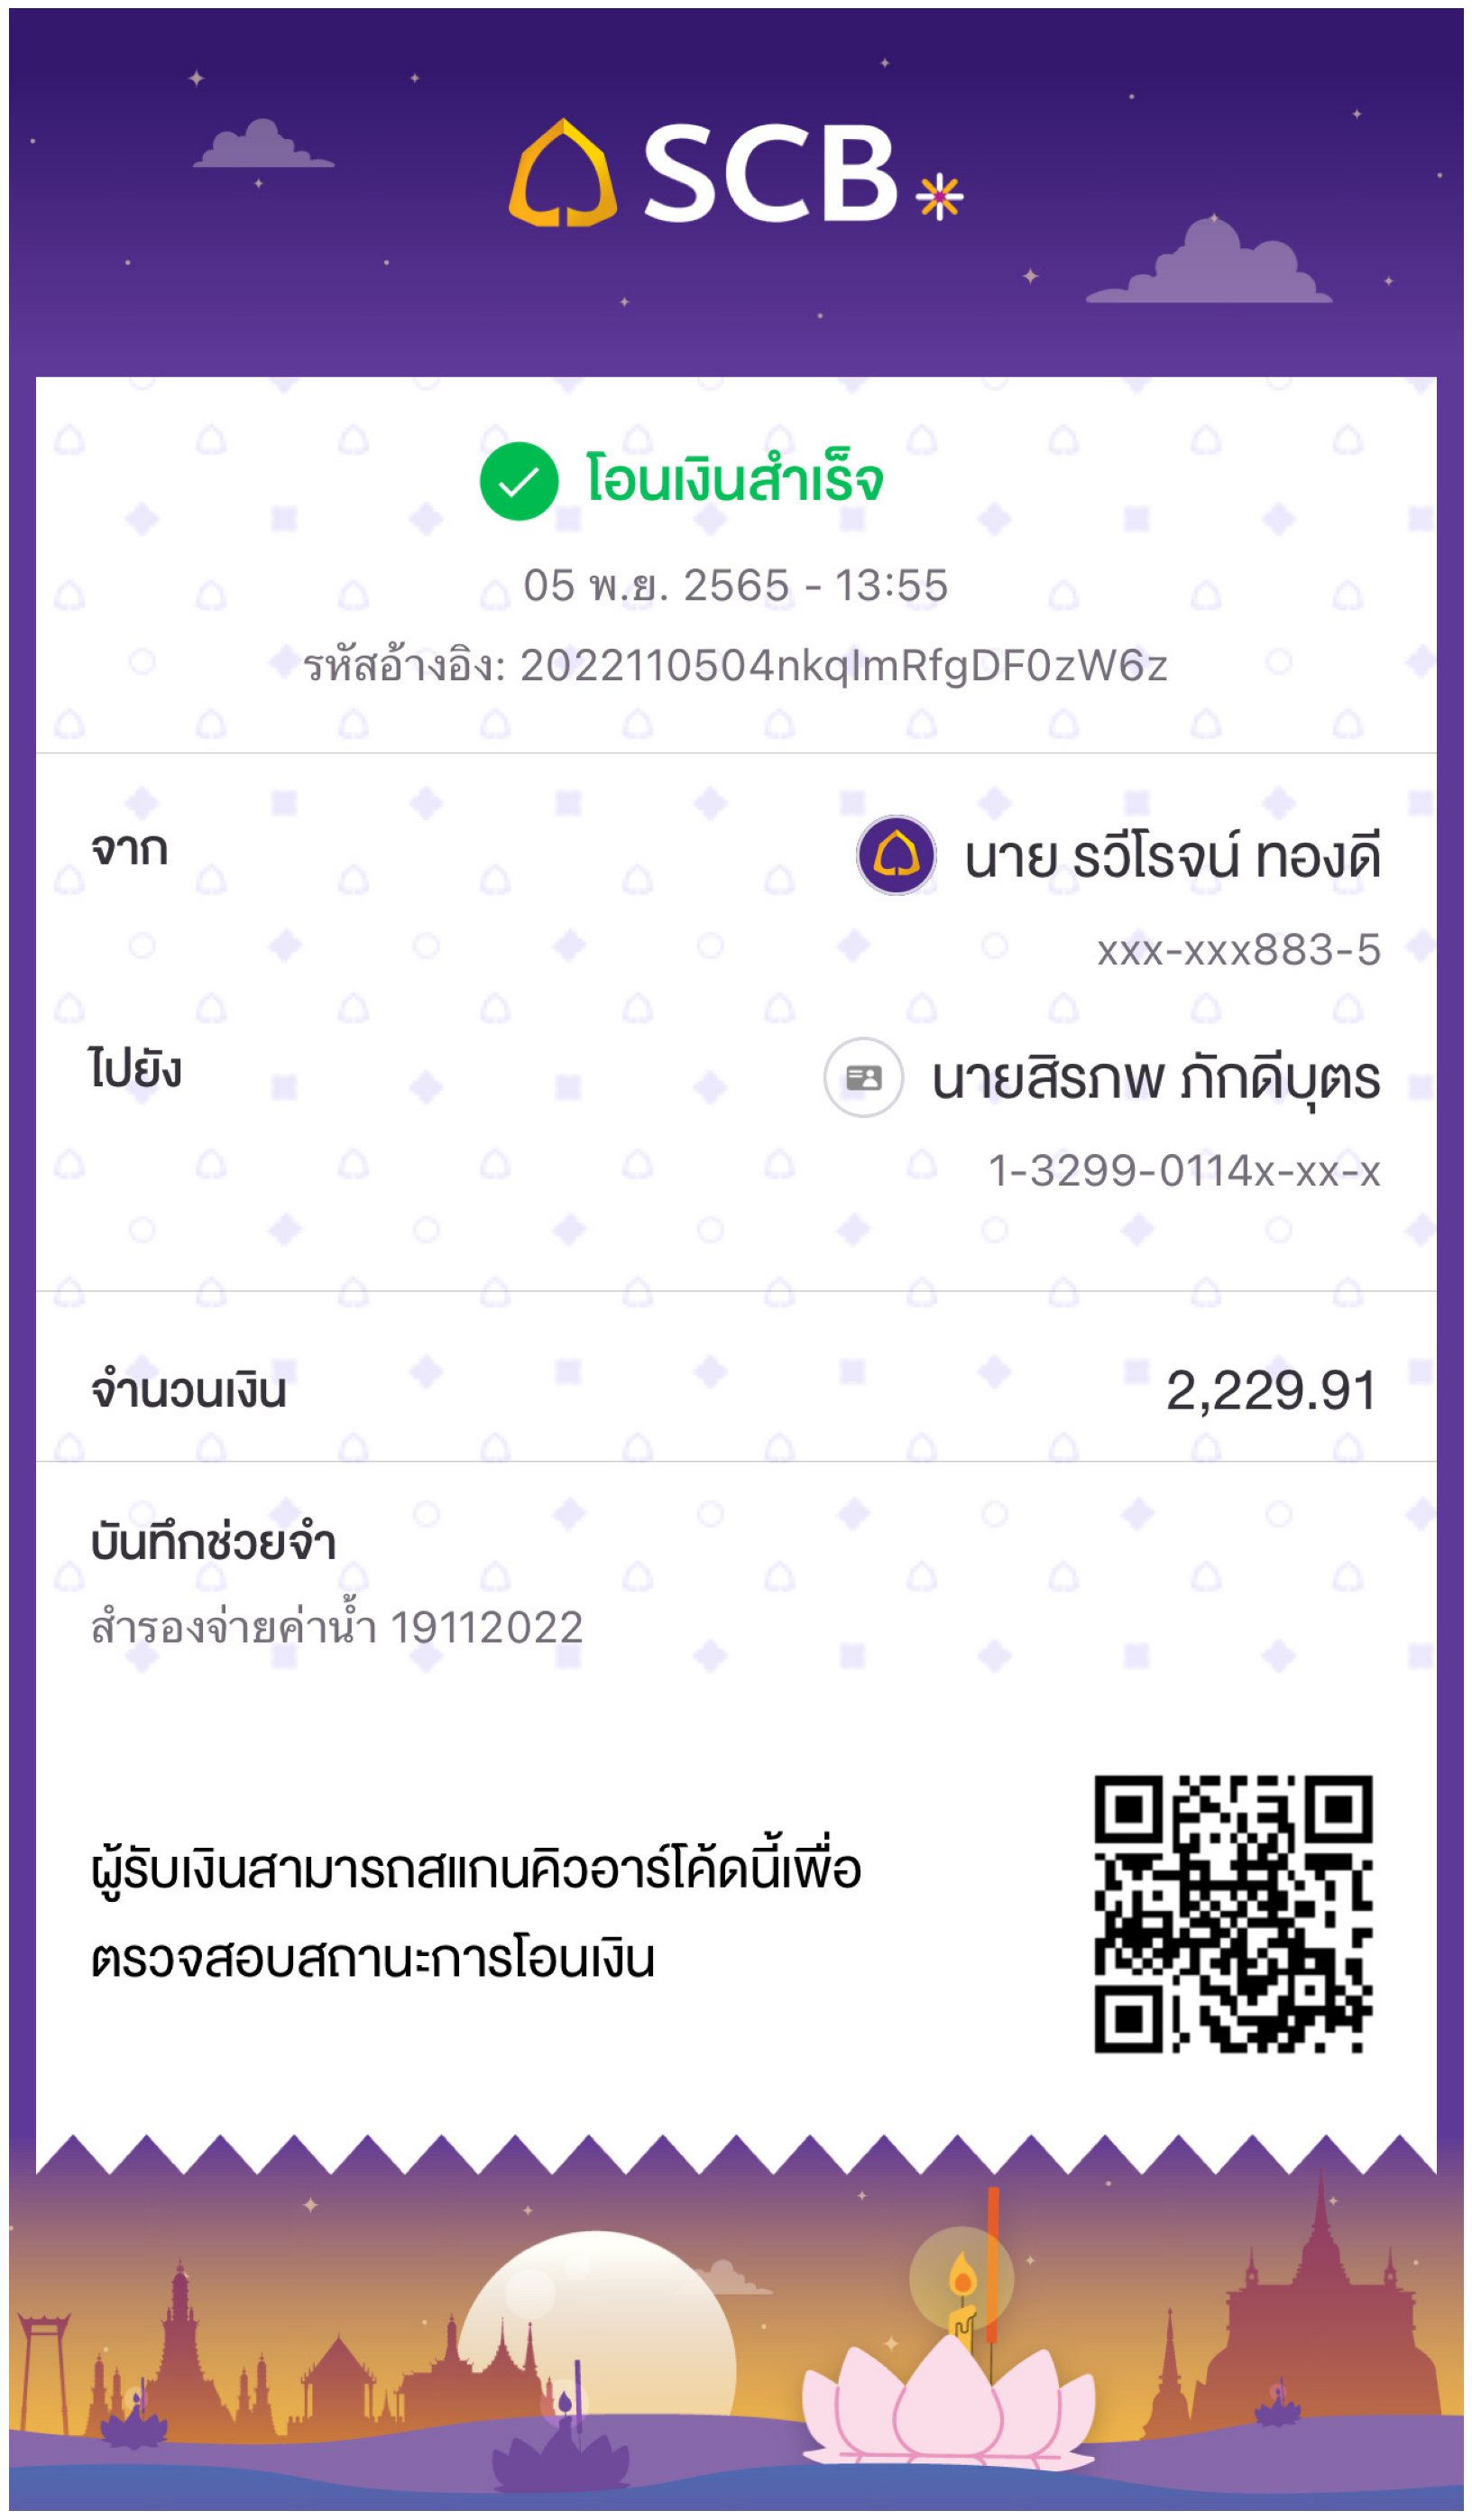

In [58]:
display(im_file)

# Binarization

In [59]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [60]:
gray_image = grayscale(img)
cv2.imwrite("D:\\homework\\D4-1\\OCR_ReceiptWise\\testpytesseract\\temp\\gray.jpg", gray_image)

True

In [61]:
# display("testpytesseract/temp/gray.jpg")

In [62]:
thresh, im_bw = cv2.threshold(gray_image, 220, 255, cv2.THRESH_BINARY)
cv2.imwrite("D:\\homework\D4-1\\OCR_ReceiptWise\\testpytesseract\\temp\\bw_image.jpg", im_bw)

True

In [63]:
# display("testpytesseract/temp/bw_image.jpg")

# Noise Removal

In [64]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [65]:
no_noise = noise_removal(im_bw)
cv2.imwrite("D:\\homework\\D4-1\\OCR_ReceiptWise\\testpytesseract\\temp\\no_noise.jpg", no_noise)

True

In [66]:
# display("testpytesseract/temp/no_noise.jpg")

In [67]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

# Dilation and Erosion

In [68]:
eroded_image = thin_font(no_noise)
cv2.imwrite("D:\\homework\\D4-1\\OCR_ReceiptWise\\testpytesseract\\temp\\eroded_image.jpg", eroded_image)

True

In [69]:
# display("testpytesseract/temp/eroded_image.jpg")

In [70]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [71]:
dilated_image = thick_font(no_noise)
cv2.imwrite("D:\\homework\\D4-1\\OCR_ReceiptWise\\testpytesseract\\temp\\dilated_image.jpg", dilated_image)

True

In [72]:
# display("testpytesseract/temp/dilated_image.jpg")

# Removing Border

In [73]:
def remove_borders(image):
    contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return (crop)

In [74]:
no_borders = remove_borders(no_noise)
cv2.imwrite("D:\\homework\\D4-1\\OCR_ReceiptWise\\testpytesseract\\temp\\no_borders.jpg", no_borders)
# display('testpytesseract/temp/no_borders.jpg')

True

# OCR

In [75]:
# !pip install pytesseract

In [76]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

In [77]:
image_file = ''
img = Image.open(image_file)

AttributeError: 'str' object has no attribute 'read'

In [ ]:
import os

# Set TESSDATA_PREFIX
os.environ['TESSDATA_PREFIX'] = r'C:\Program Files\Tesseract-OCR'

In [ ]:
ocr_result = pytesseract.image_to_string(img, lang='eng+tha',config= '--psm 3')
print(ocr_result)

ร หั ส อ้ า ง อิ ง : 202211266a0vsdFShV4qYkAQH



In [ ]:
new_res = "".join(['' if i == ' ' else i for i in ocr_result])
print(new_res)

รหัสอ้างอิง:202211266a0vsdFShV4qYkAQH



# 